In [2]:
import numpy as np
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt

#### plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv('tested.csv')

In [4]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [5]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
408,1300,1,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
410,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [7]:
df.shape

(418, 12)

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
df_sex = df
df_sex.groupby('Sex').size()

Sex
female    152
male      266
dtype: int64

In [10]:
df_sex.groupby(['Sex', 'Survived']).size()

Sex     Survived
female  1           152
male    0           266
dtype: int64

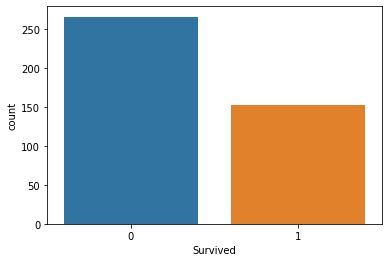

In [11]:
sb.countplot(x ='Survived', data=df)
plt.show()

In [12]:
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  1           152
male    0           266
Name: Survived, dtype: int64

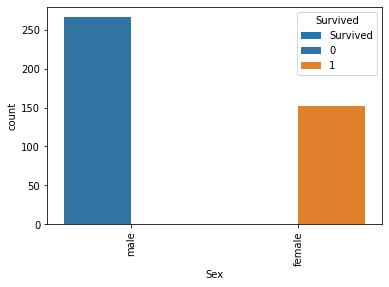

In [13]:
df[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar()
sb.countplot(x = 'Sex', hue='Survived', data=df,)
plt.show()

We can see that on this data collection, all males died, and all females survived.

In [14]:
df[['Pclass', 'Survived']].groupby('Survived').agg({"Pclass":"mean"})

,Pclass
Survived,
0,2.334586
1,2.144737


In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

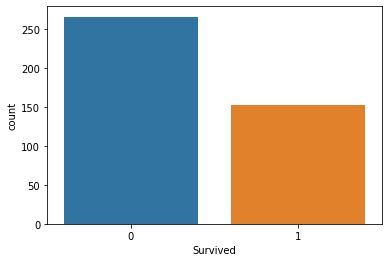

In [16]:
sb.countplot(x ='Survived', data=df)
plt.show()

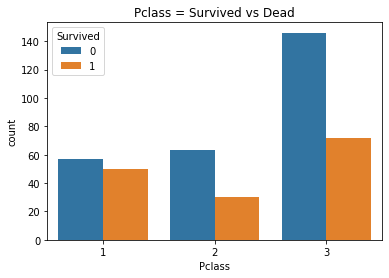

In [17]:
sb.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Pclass = Survived vs Dead')
plt.show()

We can observe that in proportion, more passengers died who travelled in 3rd class as opposed to 1st and 2nd classes.

In [21]:
pd.crosstab([df.Sex, df.Survived], df.Pclass, margins = True).style.background_gradient(cmap='summer_r')

,Pclass,1,2,3,All
Sex,Survived,,,,
female,1,50,30,72,152
male,0,57,63,146,266
All,,107,93,218,418


Breaking down the numbers, we can see that from our dataset there were 152 women which all survived, the majority of them from 3rd class. Whilst 266 men which all died, the majority of them also from 3rd class.

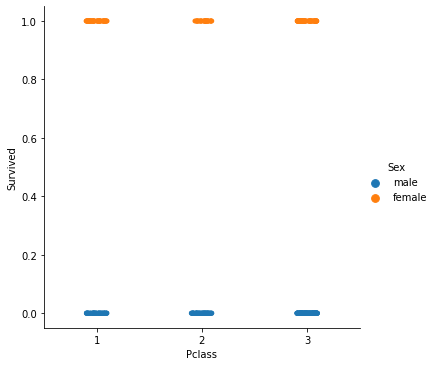

In [29]:
sb.catplot(x='Pclass', y='Survived', hue='Sex', data=df)
plt.show()

As we know by now, with this data, the chances of surviving as a male are 0, whilst 100 as a woman. Let's explore other variables.

In [39]:
print('Age of oldest person who survived: ', df['Age'].max())
print('Age of youngest person who survived: ', df['Age'].min())
print('Average age of a survivor', df['Age'].mean())

Age of oldest person who survived:  76.0
Age of youngest person who survived:  0.17
Average age of a survivor 30.272590361445783


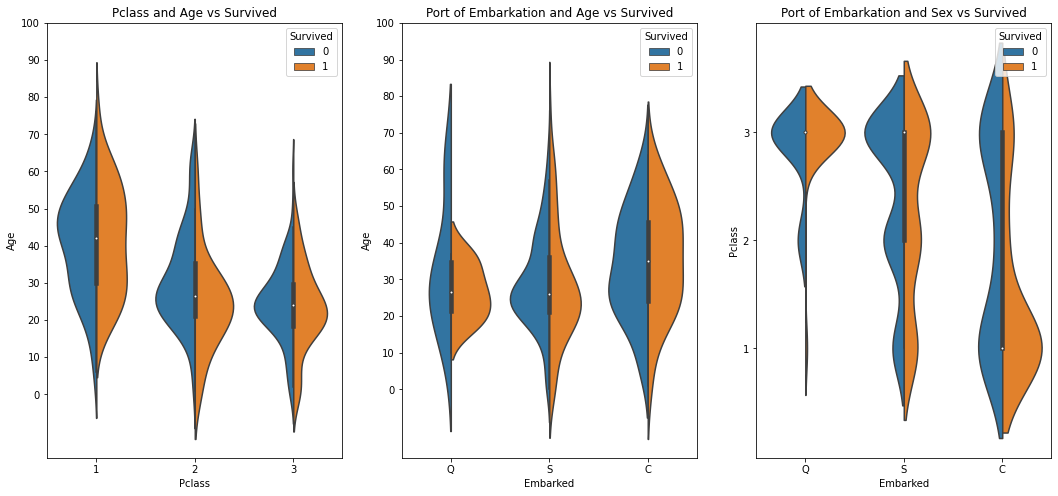

In [53]:
f, ax=plt.subplots(1, 3, figsize=(18,8))
sb.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sb.violinplot(x='Embarked', y='Age', hue='Survived', data=df, split=True, ax=ax[1])
ax[1].set_title('Port of Embarkation and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
sb.violinplot(x='Embarked', y='Pclass', hue='Survived', data=df, split=True, ax=ax[2])
ax[2].set_title('Port of Embarkation and Sex vs Survived')
ax[2].set_yticks(range(1, 4, 1))

In [44]:
df_emb = df
df_emb.groupby('Embarked').size()

Embarked
C    102
Q     46
S    270
dtype: int64

In [54]:
df_sibsp = df
df_sibsp.groupby('SibSp').size()

SibSp
0    283
1    110
2     14
3      4
4      4
5      1
8      2
dtype: int64

The SibSp feature tells us if the passenger was travelling alone or with siblings(Sib) or spoueses(Sp).
We can quickly see the majority of our data had no companions, but there is a signinifcant amount of people who were travelling with family. Let's look at this a bit closer

In [58]:
pd.crosstab([df_sibsp.SibSp], df_sibsp.Sex).style.background_gradient('summer_r')

Sex,female,male
SibSp,,
0,88,195
1,54,56
2,6,8
3,1,3
4,1,3
5,1,0
8,1,1


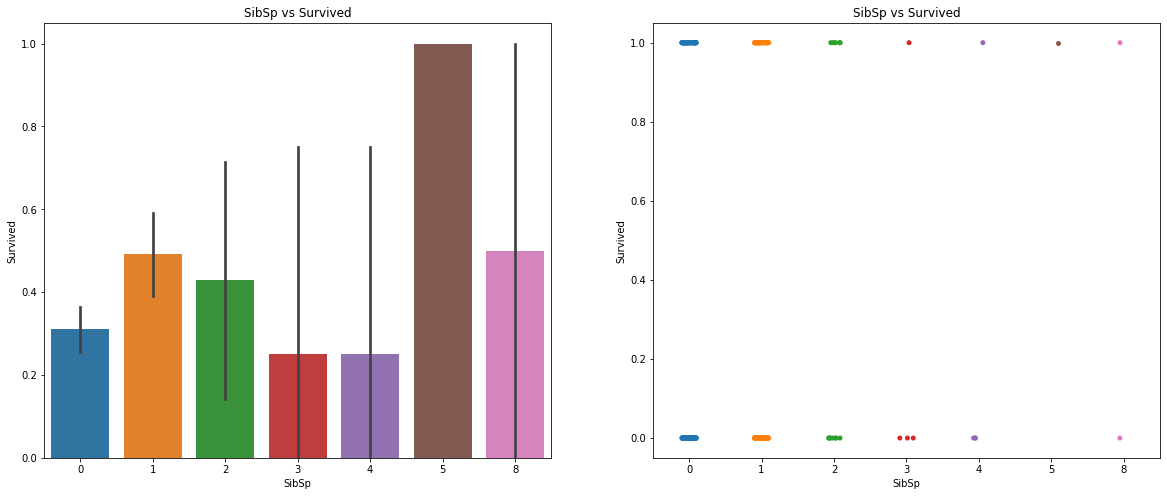

In [70]:
f, ax = plt.subplots(1, 2,figsize=(20,8))
sb.barplot(x='SibSp', y='Survived', data=df_sibsp, ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sb.stripplot(x='SibSp', y='Survived', data=df_sibsp, ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()